### ปริยวิศว์ เตชะกฤตเมธีธำรง 6510450593

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn import metrics

In [2]:
df = pd.read_csv('../Datasets/fertility2.csv')
df.head()

,Age,kidney diseases,Fasting Blood sugar,Uri infection,exercise habit,Frequency of alcohol consumption,Smoking habit,profession,#hours spent sitting per day,Diagnosis
0,30,no,80,yes,more than 3 months ago,once a week,occasional,engineer,16,Normal
1,35,yes,140,yes,less than 3 hours a week,once a week,daily,engineer,6,weak
2,27,yes,99,no,no,hardly ever or never,never,engineer,9,Normal
3,44,no,96,yes,more than 3 months ago,hardly ever or never,never,pilot,7,Normal
4,30,yes,134,no,less than 3 hours a week,once a week,never,engineer,9,weak


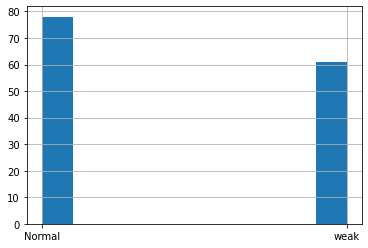

In [3]:
df['Diagnosis'].hist();

### เช็ค missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Age                               139 non-null    int64 
 1   kidney diseases                   139 non-null    object
 2   Fasting Blood sugar               139 non-null    int64 
 3   Uri infection                     139 non-null    object
 4   exercise habit                    139 non-null    object
 5   Frequency of alcohol consumption  139 non-null    object
 6   Smoking habit                     139 non-null    object
 7   profession                        139 non-null    object
 8   #hours spent sitting per day      139 non-null    int64 
 9   Diagnosis                         139 non-null    object
dtypes: int64(3), object(7)
memory usage: 11.0+ KB


### เปลี่ยนค่า no กับ no exercise ใน exercise habit ให้เป็นค่าเดียวกัน

In [5]:
df['exercise habit'].value_counts()

exercise habit
more than 3 months ago      44
no                          42
less than 3 hours a week    39
no exercise                  8
less than 3 months ago       6
Name: count, dtype: int64

In [6]:
df['exercise habit'] = df['exercise habit'].replace('no', 'no exercise')
df['exercise habit'].value_counts()

exercise habit
no exercise                 50
more than 3 months ago      44
less than 3 hours a week    39
less than 3 months ago       6
Name: count, dtype: int64

### แบ่ง features แบะ label

In [7]:
df.columns

Index(['Age', 'kidney diseases', 'Fasting Blood sugar', 'Uri infection',
       'exercise habit', 'Frequency of alcohol consumption', 'Smoking habit',
       'profession', '#hours spent sitting per day', 'Diagnosis'],
      dtype='object')

In [8]:
feature_cols = ['Age', 'kidney diseases', 'Fasting Blood sugar', 'Uri infection',
       'exercise habit', 'Frequency of alcohol consumption', 'Smoking habit',
       'profession', '#hours spent sitting per day']

In [9]:
X = df[feature_cols]
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, random_state=123)

### preprocessing + build & train model

In [10]:
col_trans = make_column_transformer(
    (OneHotEncoder(), ['kidney diseases', 'Uri infection', 
                       'exercise habit', 'Frequency of alcohol consumption', 
                       'Smoking habit', 'profession']),
    remainder='passthrough'
)

col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 ['kidney diseases', 'Uri infection',
                                  'exercise habit',
                                  'Frequency of alcohol consumption',
                                  'Smoking habit', 'profession'])])

In [11]:
model = SVC(kernel='rbf')
pipe = make_pipeline(col_trans, model)

In [12]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['kidney diseases',
                                                   'Uri infection',
                                                   'exercise habit',
                                                   'Frequency of alcohol '
                                                   'consumption',
                                                   'Smoking habit',
                                                   'profession'])])),
                ('svc', SVC())])

### วัด score

In [13]:
print('Test score:', pipe.score(X_test, y_test))
print('Train score:', pipe.score(X_train, y_train))

Test score: 0.7714285714285715
Train score: 0.7211538461538461


In [14]:
y_pred = pipe.predict(X_test)

In [15]:
metrics.confusion_matrix(y_test, y_pred)
# ทายผิด 8
# ทายถูก 27

array([[17,  3],
       [ 5, 10]], dtype=int64)